# Image classification with CNN

 # Custom CNN 

## CNN COMPLEX

x_train shape: (4162, 256, 256, 3) - y_train shape: (4162, 2)
x_test shape: (580, 256, 256, 3) - y_test shape: (580, 2)


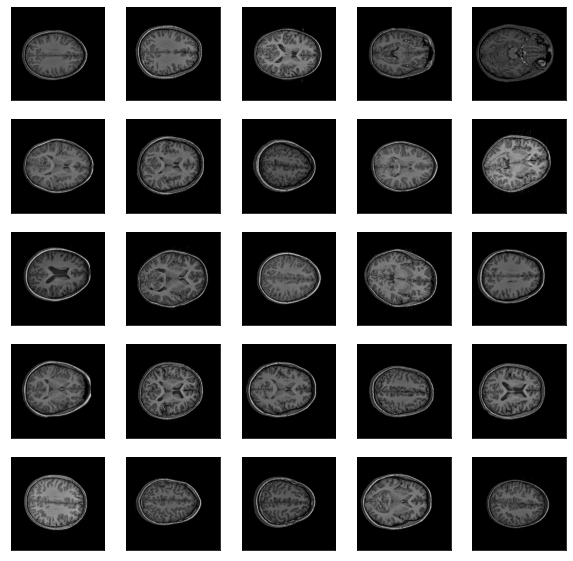

In [1]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import tensorflow.keras as keras  # Importing from tensorflow.keras

num_classes = 2
input_shape = (256, 256, 3)  # Updated image size
train_data_dir = "/kaggle/input/autism-fmri-new/cp data splitted/train"
test_data_dir = "/kaggle/input/autism-fmri-new/cp data splitted/test"

# Create a mapping between class labels and integer IDs
class_mapping = {'Autism':0, 'Control':1}

# Load data from custom directories
def load_custom_data(data_dir, class_mapping, input_shape):
    images = []
    labels = []

    for class_label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_label)
        if os.path.isdir(class_dir):
            class_id = class_mapping[class_label]
            for image_file in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_file)
                image = load_img(image_path, target_size=input_shape[:2])  # Adjusted target size
                image = img_to_array(image) / 255.0
                images.append(image)
                labels.append(class_id)

    x = np.array(images)
    y = keras.utils.to_categorical(labels, num_classes)
    return x, y

x_train, y_train = load_custom_data(train_data_dir, class_mapping, input_shape)
x_test, y_test = load_custom_data(test_data_dir, class_mapping, input_shape)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model(input_shape, dropout_rate=0.25, num_classes=2):
    input_layer = layers.Input(shape=input_shape)

    # CNN layers
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)

    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    pool3 = layers.MaxPooling2D((2, 2))(conv3)

    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    pool4 = layers.MaxPooling2D((2, 2))(conv4)

    conv5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    pool5 = layers.MaxPooling2D((2, 2))(conv5)

    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool5)
    pool6 = layers.MaxPooling2D((2, 2))(conv6)

    conv7 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(pool6)
    pool7 = layers.MaxPooling2D((2, 2))(conv7)

    # Flatten
    flatten = layers.Flatten()(pool7)

    # Dropout before FC layers
    drop_fc1 = layers.Dropout(dropout_rate)(flatten)
    dense4 = layers.Dense(700, activation='relu')(drop_fc1)
    output = layers.Dense(num_classes, activation='softmax')(dense4)

    model_cnn = models.Model(inputs=input_layer, outputs=output)
    return model_cnn

# Example usage
input_shape = (256, 256, 3)
num_classes = 2
model_cnn_new = create_model(input_shape, dropout_rate=0.25, num_classes=num_classes)
model_cnn_new.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 128)       0   

In [7]:
# Create the CNN model
model_cnn_new = create_model(input_shape)  # Assuming channels-last format

# Compile the model
model_cnn_new.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
              metrics=['accuracy'])

In [8]:
# Train the model
history = model_cnn_new.fit(
    x_train,
    y_train,
    batch_size=120,
    epochs=25,
    validation_split=0.2)  # Use validation_split to automatically split training data for validation

# Evaluate the model on the test set
test_loss, test_accuracy = model_cnn_new.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/25
28/28 [==============================] - 7s 223ms/step - loss: 0.6801 - accuracy: 0.6293 - val_loss: 1.1755 - val_accuracy: 0.0000e+00
Epoch 2/25
28/28 [==============================] - 5s 172ms/step - loss: 0.6535 - accuracy: 0.6389 - val_loss: 1.1594 - val_accuracy: 0.0000e+00
Epoch 3/25
28/28 [==============================] - 5s 171ms/step - loss: 0.6431 - accuracy: 0.6389 - val_loss: 1.0230 - val_accuracy: 0.0000e+00
Epoch 4/25
28/28 [==============================] - 5s 173ms/step - loss: 0.6203 - accuracy: 0.6389 - val_loss: 0.8280 - val_accuracy: 0.0000e+00
Epoch 5/25
28/28 [==============================] - 5s 171ms/step - loss: 0.6109 - accuracy: 0.6524 - val_loss: 1.0617 - val_accuracy: 0.2149
Epoch 6/25
28/28 [==============================] - 5s 174ms/step - loss: 0.5939 - accuracy: 0.6996 - val_loss: 0.8963 - val_accuracy: 0.3277
Epoch 7/25
28/28 [==============================] - 5s 173ms/step - loss: 0.5512 - accuracy: 0.7281 - val_loss: 1.4638 - val_accurac

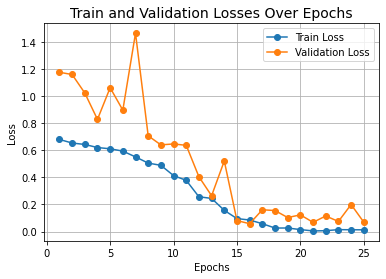

In [9]:
import matplotlib.pyplot as plt

# Assuming history contains the training history with "loss" and "val_loss" keys

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, marker='o', label="Train Loss")
plt.plot(epochs, val_loss, marker='o', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()


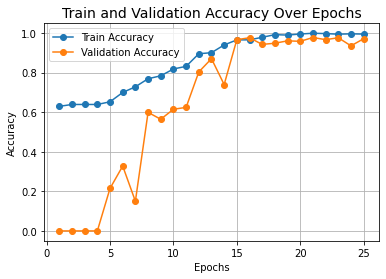

In [10]:
import matplotlib.pyplot as plt

# Assuming history contains the training history with "accuracy" and "val_accuracy" keys

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, marker='o', label="Train Accuracy")
plt.plot(epochs, val_acc, marker='o', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()


In [11]:
import numpy as np
y_pred=model_cnn_new.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
y_true_classes = np.argmax(y_test, axis=1)
# Get classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_true_classes, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true_classes, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       254
           1       0.98      0.94      0.96       326

    accuracy                           0.95       580
   macro avg       0.95      0.96      0.95       580
weighted avg       0.95      0.95      0.95       580

Confusion Matrix:
[[248   6]
 [ 21 305]]


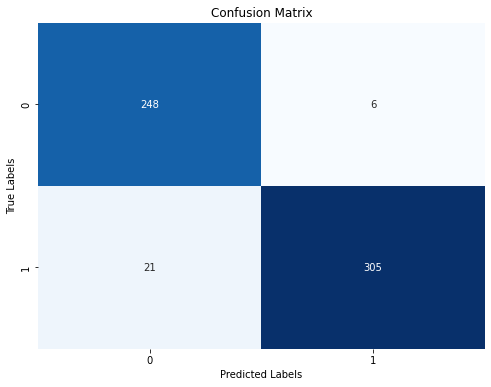

In [13]:
import seaborn as sns
# Plot confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Calculate and print accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Calculate and print confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.95
Precision: 0.98
Recall: 0.94
F1-score: 0.96
Confusion Matrix:
[[248   6]
 [ 21 305]]


In [24]:
# Save the model
model_cnn_new.save('/kaggle/working/model_cnn_complex1.h5')